In [58]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import scipy as sp
import seaborn as sns
np.set_printoptions(precision=2, linewidth=120)
from copy import copy
from tqdm import *
from drift_qec.Q import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [83]:
data = channel.sample_data()
L = SENSOR(D, D, D)
L[:, 0] = L[:, 0] - L[:, 5]
L[:, 3] = L[:, 3] - L[:, 5]
data = data - L[:, 5]
L = L[:, :5]

In [87]:
LDIAG = L[:, [0, 3]]
LOFFD = L[:, [1, 2, 4]]

In [88]:
mdiag = np.dot(np.dot(np.linalg.inv(np.dot(LDIAG.T, LDIAG)), LDIAG.T), data)

In [89]:
mdiag

array([ 0.65,  0.33])

In [94]:
np.dot(LDIAG, mdiag)

array([ 0.49,  0.49, -0.98, -0.17,  0.33, -0.17,  0.65, -0.32, -0.32])

In [95]:
data

array([ 0.66,  0.32, -0.98,  0.17,  0.33, -0.49,  0.64, -0.15, -0.49])

In [90]:
offdata = data - np.dot(LDIAG, mdiag)

In [92]:
moffd = np.dot(np.dot(np.linalg.inv(np.dot(LOFFD.T, LOFFD)), LOFFD.T), offdata)

In [93]:
moffd

array([-0.34, -0.66, -0.33])

In [75]:
L[:, [0, 3]]

array([[  5.00e-01,   5.00e-01],
       [  5.00e-01,   5.00e-01],
       [ -1.00e+00,  -1.00e+00],
       [  2.22e-16,  -5.00e-01],
       [  0.00e+00,   1.00e+00],
       [ -2.22e-16,  -5.00e-01],
       [  1.00e+00,   0.00e+00],
       [ -5.00e-01,   2.22e-16],
       [ -5.00e-01,  -2.22e-16]])

## Regime 1 basis alignment

In [67]:
D = 0.01*np.pi
N_TRIALS = 100
MAX_N = int(1e6)
N_STEP = int(1e3)
RECORDS = []
for trial in tqdm(range(N_TRIALS)):
    channel = Channel(kx=0.7, ky=0.2, kz=0.1,
                      Q=np.linalg.qr(np.random.randn(3,3))[0],
                      n=N_STEP, d1=D, d2=D, d3=D)
    pxhat, pyhat, pzhat = list(np.linalg.eig(channel.Mhat)[0])
    RECORDS.append({
            "trial": trial,
            "time": 0,
            "tr": np.trace(channel.Mhat),
            "d1": channel.d1, "d2": channel.d2, "d3": channel.d3,
            "Mdist": np.linalg.norm(channel.Mhat-channel.C),
            "Qdist": np.linalg.norm(np.dot(channel.Qc.T, channel.Q) - np.eye(3)),
            "pxval": channel.kx, "pyval": channel.ky, "pzval": channel.kz,
            "pxhat": pxhat, "pyhat": pyhat, "pzhat": pzhat
        })
    for time in range(0, MAX_N, N_STEP):
        channel.update()
        pxhat, pyhat, pzhat = list(np.linalg.eig(channel.Mhat)[0])
        channel.d1 = D * np.min([pxhat, pyhat]) / np.sqrt(np.abs(pxhat-pyhat))
        channel.d2 = D * np.min([pxhat, pzhat]) / np.sqrt(np.abs(pxhat-pzhat))
        channel.d3 = D * np.min([pyhat, pzhat]) / np.sqrt(np.abs(pyhat-pzhat))
        RECORDS.append({
                "trial": trial,
                "time": time,
                "tr": np.trace(channel.Mhat),
                "d1": channel.d1, "d2": channel.d2, "d3": channel.d3,
                "Mdist": np.linalg.norm(channel.Mhat-channel.C),
                "Qdist": np.linalg.norm(np.dot(channel.Qc.T, channel.Q) - np.eye(3)),
                "pxval": channel.kx, "pyval": channel.ky, "pzval": channel.kz,
                "pxhat": pxhat, "pyhat": pyhat, "pzhat": pzhat
            })

df = pd.DataFrame(RECORDS)
df.to_csv("regime1_adaptive_delta.csv")

In [68]:
D = 0.25*np.pi
N_TRIALS = 100
MAX_N = int(1e6)
N_STEP = int(1e3)
RECORDS = []
for trial in tqdm(range(N_TRIALS)):
    channel = Channel(kx=0.985, ky=0.01, kz=0.005,
                      Q=np.linalg.qr(np.random.randn(3,3))[0],
                      n=N_STEP, d1=D, d2=D, d3=D)
    pxhat, pyhat, pzhat = list(np.linalg.eig(channel.Mhat)[0])
    RECORDS.append({
            "trial": trial,
            "time": 0,
            "tr": np.trace(channel.Mhat),
            "d1": channel.d1, "d2": channel.d2, "d3": channel.d3,
            "Mdist": np.linalg.norm(channel.Mhat-channel.C),
            "Qdist": np.linalg.norm(np.dot(channel.Qc.T, channel.Q) - np.eye(3)),
            "pxval": channel.kx, "pyval": channel.ky, "pzval": channel.kz,
            "pxhat": pxhat, "pyhat": pyhat, "pzhat": pzhat
        })
    for time in range(0, MAX_N, N_STEP):
        channel.update()
        pxhat, pyhat, pzhat = list(np.linalg.eig(channel.Mhat)[0])
        channel.d1 = D * np.min([pxhat, pyhat]) / np.sqrt(np.abs(pxhat-pyhat))
        channel.d2 = D * np.min([pxhat, pzhat]) / np.sqrt(np.abs(pxhat-pzhat))
        channel.d3 = D * np.min([pyhat, pzhat]) / np.sqrt(np.abs(pyhat-pzhat))
        RECORDS.append({
                "trial": trial,
                "time": time,
                "tr": np.trace(channel.Mhat),
                "d1": channel.d1, "d2": channel.d2, "d3": channel.d3,
                "Mdist": np.linalg.norm(channel.Mhat-channel.C),
                "Qdist": np.linalg.norm(np.dot(channel.Qc.T, channel.Q) - np.eye(3)),
                "pxval": channel.kx, "pyval": channel.ky, "pzval": channel.kz,
                "pxhat": pxhat, "pyhat": pyhat, "pzhat": pzhat
            })

df = pd.DataFrame(RECORDS)
df.to_csv("regime2_adaptive_delta.csv")

In [69]:
df1 = pd.read_csv("regime1_adaptive_delta.csv")
v1 = df1.groupby("time").mean()
s1 = df1.groupby("time").std()

df2 = pd.read_csv("regime2_adaptive_delta.csv")
v2 = df2.groupby("time").mean()
s2 = df2.groupby("time").std()

IndexError: index 3 is out of bounds for axis 1 with size 3

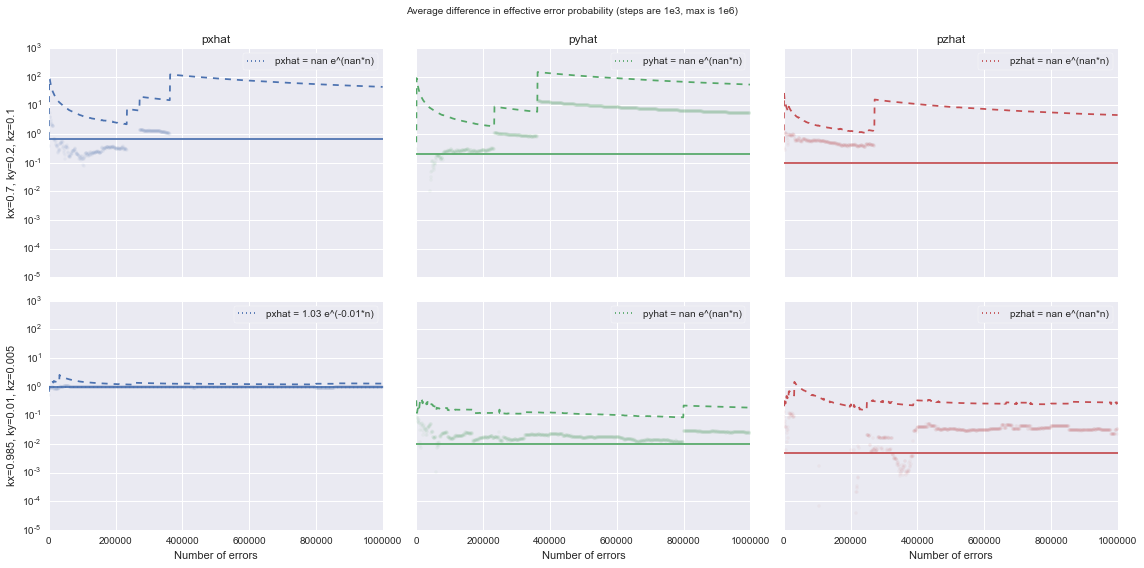

In [71]:
fig, axs = plt.subplots(2, 3, figsize=(16, 8), sharey=True, sharex=True,
                        tight_layout={"h_pad": 1.0, "rect": [0.0, 0.0, 1.0, 0.95]})

for idx, stat in enumerate(["pxhat", "pyhat", "pzhat"]):
    t1 = v1[stat].index.values
    y1 = v1[stat].values
    e1 = s1[stat].values
    x = np.log(v1.loc[1:, stat].index.values)
    y = np.log(v1.loc[1:, stat].values)
    reg = sp.stats.linregress(x, y)
    fitted = np.exp(reg.intercept + reg.slope * x)
    axs[0, idx].semilogy(t1, y1, ls="", marker=".", color=sns.color_palette()[idx], alpha=0.05)
    axs[0, idx].semilogy(t1, y1+e1, ls="--", color=sns.color_palette()[idx])
    axs[0, idx].semilogy(t1[1:], fitted, ls=":", color=sns.color_palette()[idx],
                         label="{} = {:0.2f} e^({:0.2f}*n)".format(stat, np.exp(reg.intercept), reg.slope))
    axs[0, idx].axhline(df1.loc[0, stat[:2]+"val"], color=sns.color_palette()[idx])
    axs[0, idx].set_title(stat)
    axs[0, idx].legend(frameon=True)
    
    t2 = v2[stat].index.values
    y2 = v2[stat].values
    e2 = s2[stat].values
    x = np.log(v2.loc[1:, stat].index.values)
    y = np.log(v2.loc[1:, stat].values)
    reg = sp.stats.linregress(x, y)
    fitted = np.exp(reg.intercept + reg.slope * x)
    axs[1, idx].semilogy(t2, y2, ls="", marker=".", color=sns.color_palette()[idx], alpha=0.05)
    axs[1, idx].semilogy(t2, y2+e2, ls="--", color=sns.color_palette()[idx])
    axs[1, idx].semilogy(t2[1:], fitted, ls=":", color=sns.color_palette()[idx],
                         label="{} = {:0.2f} e^({:0.2f}*n)".format(stat, np.exp(reg.intercept), reg.slope))
    axs[1, idx].axhline(df2.loc[0, stat[:2]+"val"], color=sns.color_palette()[idx])
    axs[1, idx].set_xlabel("Number of errors")
    axs[1, idx].legend(frameon=True)

fig.suptitle("Average difference in effective error probability (steps are 1e3, max is 1e6)")
axs[0, 0].set_ylabel("kx=0.7, ky=0.2, kz=0.1")
axs[1, 0].set_ylabel("kx=0.985, ky=0.01, kz=0.005")

axs[0, 3].semilogy(v1["d"].index.values, v1["d"].values, color=sns.color_palette()[3])
axs[1, 3].semilogy(v2["d"].index.values, v2["d"].values, color=sns.color_palette()[3])

axs[1, 0].set_ylim([0.001, 1.0])
axs[0, 0].set_ylim([0.001, 1.0])
fig.savefig("adaptivedelta_1e3_1e6.pdf")